In [29]:
# __author__ = 'Bhanu Verma'
# GTid = '903151012'

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from pyfm import pylibfm
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
%matplotlib inline

# Question 3.a

In [31]:
df = pd.read_csv('ml-100k/ua.base', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

In [32]:
test_df = pd.read_csv('ml-100k/ua.test', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

In [33]:
user_df = df.groupby(['user_id']).count()
item_df = df.groupby(['item_id']).count()

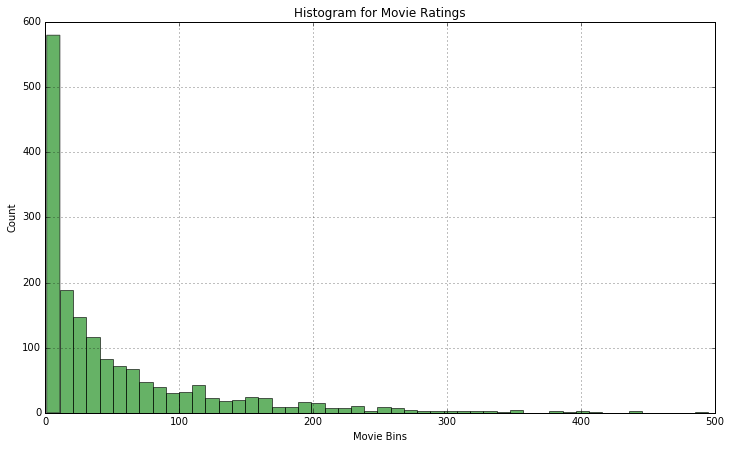

In [34]:
plt.figure(1, figsize=(12, 7))
plt.xlabel('Movie Bins')
plt.ylabel('Count')
plt.title('Histogram for Movie Ratings')
plt.hist(item_df['user_id'], bins=50, facecolor='green', alpha=0.6)
plt.grid(True)
plt.show()

# Question 3.b

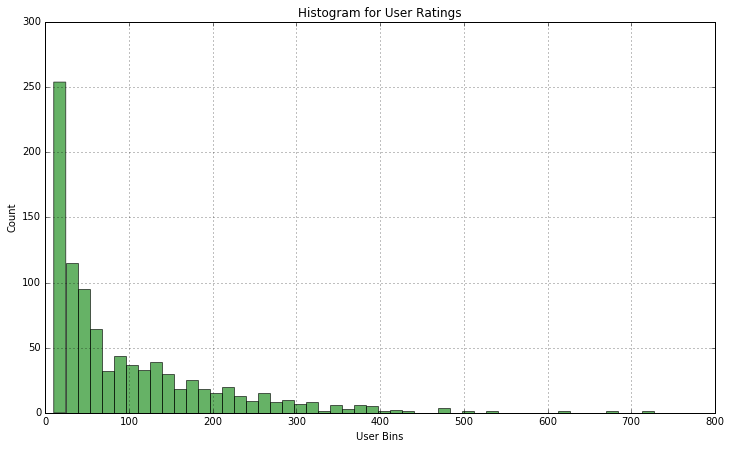

In [35]:
plt.figure(1, figsize=(12, 7))
plt.xlabel('User Bins')
plt.ylabel('Count')
plt.title('Histogram for User Ratings')
plt.hist(user_df['item_id'], bins=50, facecolor='green', alpha=0.6)
plt.grid(True)
plt.show()

In [36]:
user = df['user_id'].values
item = df['item_id'].values
ratings = df['rating'].values
mat = csc_matrix((ratings, (user, item)))
mat = mat[1:,1:]

# Question 6.a

In [53]:
# Code referenced from https://github.com/coreylynch/pyFM
def loadData(filePathStr,path="ml-100k/"):
    data = []
    y = []
    user_age = {}
    user_gender = {}
    
    if len(filePathStr) == 1:
        with open(path+filePathStr[0]) as f:
            for line in f:
                (user,movieid,rating,timestamp)=line.split('\t')
                data.append({"user_id": str(user),"movie_id": str(movieid)})
                y.append(float(rating))
    else:
        with open(path+filePathStr[0]) as f:
            for line in f:
                (user,age,gender,occupation,zipcode) = line.split('|')
                user_age[user] = str(age)
                user_gender[user] = str(gender)
                
        with open(path+filePathStr[1]) as f:
            for line in f:
                (user,movieid,rating,timestamp)=line.split('\t')
                data.append({"user_id": str(user),"movie_id": str(movieid),"user_age":user_age[user],
                             "user_gender":user_gender[user]})
                y.append(float(rating))

    return (data, np.array(y))

In [55]:
(train_data, y_train) = loadData(["ua.base"])
(test_data, y_test) = loadData(["ua.test"])
v = DictVectorizer()
X_train = v.fit_transform(train_data)
X_test = v.transform(test_data)

# Train factorization machine
fm = pylibfm.FM(num_factors=10, num_iter=100, verbose=True, task="regression",
                initial_learning_rate=0.001, learning_rate_schedule="optimal")
fm.fit(X_train,y_train)

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.59477
-- Epoch 2
Training MSE: 0.51789
-- Epoch 3
Training MSE: 0.49024
-- Epoch 4
Training MSE: 0.47448
-- Epoch 5
Training MSE: 0.46395
-- Epoch 6
Training MSE: 0.45640
-- Epoch 7
Training MSE: 0.45077
-- Epoch 8
Training MSE: 0.44629
-- Epoch 9
Training MSE: 0.44243
-- Epoch 10
Training MSE: 0.43928
-- Epoch 11
Training MSE: 0.43659
-- Epoch 12
Training MSE: 0.43418
-- Epoch 13
Training MSE: 0.43210
-- Epoch 14
Training MSE: 0.43017
-- Epoch 15
Training MSE: 0.42841
-- Epoch 16
Training MSE: 0.42670
-- Epoch 17
Training MSE: 0.42521
-- Epoch 18
Training MSE: 0.42377
-- Epoch 19
Training MSE: 0.42248
-- Epoch 20
Training MSE: 0.42120
-- Epoch 21
Training MSE: 0.41987
-- Epoch 22
Training MSE: 0.41861
-- Epoch 23
Training MSE: 0.41742
-- Epoch 24
Training MSE: 0.41634
-- Epoch 25
Training MSE: 0.41517
-- Epoch 26
Training MSE: 0.41393
-- Epoch 27
Training MSE: 0.41273
-- Epoch 28
Tra

In [51]:
# Find Root_Mean_Square_Error
preds = fm.predict(X_test)
from sklearn.metrics import mean_squared_error
print("FM RMSE: %.4f" % (mean_squared_error(y_test,preds))**0.5)

FM RMSE: 0.9570


# Question 6.b

In [52]:
(train_data, y_train) = loadData(["u.user","ua.base"])
(test_data, y_test) = loadData(["u.user","ua.test"])
v = DictVectorizer()
X_train = v.fit_transform(train_data)
X_test = v.transform(test_data)

# Train factorization machine
fm = pylibfm.FM(num_factors=10, num_iter=100, verbose=True, task="regression",
                initial_learning_rate=0.001, learning_rate_schedule="optimal")
fm.fit(X_train,y_train)

In [48]:
# Find Root_Mean_Square_Error
preds = fm.predict(X_test)
from sklearn.metrics import mean_squared_error
print("FM RMSE: %.4f" % (mean_squared_error(y_test,preds))**0.5)

FM MSE: 0.9242


In [56]:
print 'bhanu'

bhanu
